In [1]:
import tensorflow as tf
import numpy as np
import util
import matplotlib.pyplot as plt
import io
from PIL import Image

from callbacks.AutoEncoderSummary import AutoEncoderSummary

In [2]:
Xtrain, Ytrain, Xtest, Ytest = util.getKaggleMNIST()

In [3]:
Xtrain.shape

(41000, 784)

In [4]:
np.max(Xtrain)

1.0

In [5]:
def build_model(input_shape, hidden_dim):
    inputs = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.Dense(hidden_dim, activation="relu")(inputs)
    x = tf.keras.layers.Dense(input_shape[0], activation="sigmoid")(x)

    return tf.keras.models.Model(inputs=inputs, outputs=x)

In [12]:
model = build_model((784,), 2)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.MeanSquaredError(),
)

In [28]:
summaries_dir = "summaries/autoencoder0_mnist"
tf.gfile.DeleteRecursively(summaries_dir) if tf.gfile.Exists(summaries_dir) else None
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=summaries_dir)

In [29]:
data_to_plot=[]
index = np.random.choice(range(Xtrain.shape[0]), 10)
data_train = Xtrain[index] 
index = np.random.choice(range(Xtest.shape[0]), 10)
data_test = Xtest[index]
data_to_plot.append((data_train, "train"))
data_to_plot.append((data_test, "valid"))

In [30]:
model.fit(
    x=Xtrain,
    y=Xtrain,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True,
    validation_data=(Xtest, Xtest),
    callbacks=[
        tensorboard_callback,
        AutoEncoderSummary(
            tensorboard_callback,
            data_to_plot,
            update_freq=1,
        )
    ]
)

Train on 41000 samples, validate on 1000 samples
Epoch 1/10
41000/41000 [==============================] - 3s 65us/sample - loss: 0.0556 - val_loss: 0.0563
Epoch 2/10
41000/41000 [==============================] - 2s 57us/sample - loss: 0.0556 - val_loss: 0.0563
Epoch 3/10
41000/41000 [==============================] - 2s 59us/sample - loss: 0.0556 - val_loss: 0.0563
Epoch 4/10
41000/41000 [==============================] - 2s 57us/sample - loss: 0.0555 - val_loss: 0.0562
Epoch 5/10
41000/41000 [==============================] - 2s 59us/sample - loss: 0.0555 - val_loss: 0.0562
Epoch 6/10
41000/41000 [==============================] - 2s 57us/sample - loss: 0.0555 - val_loss: 0.0562
Epoch 7/10
41000/41000 [==============================] - 2s 60us/sample - loss: 0.0555 - val_loss: 0.0562
Epoch 8/10
41000/41000 [==============================] - 2s 61us/sample - loss: 0.0555 - val_loss: 0.0562
Epoch 9/10
41000/41000 [==============================] - 2s 60us/sample - loss: 0.0555 - val_l

In [19]:
Xtrain[:2].shape
model.predict(Xtrain[:2]).shape

(2, 784)

In [20]:
Xtrain[0].reshape(28, 28, 1).shape

(28, 28, 1)

In [21]:
model.predict(Xtrain[0][np.newaxis])[0].shape

(784,)

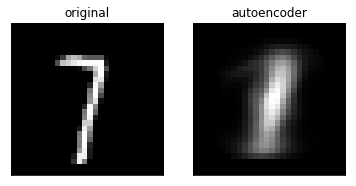

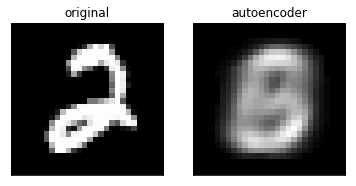

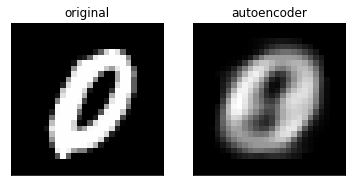

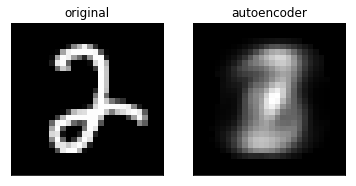

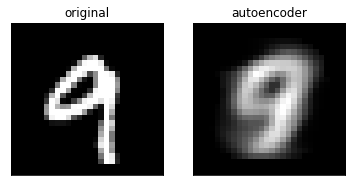

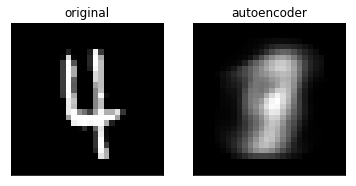

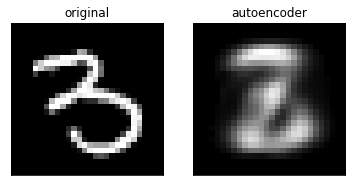

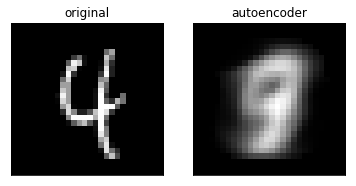

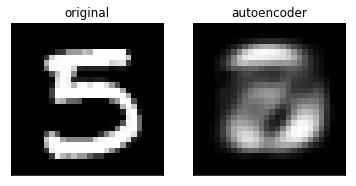

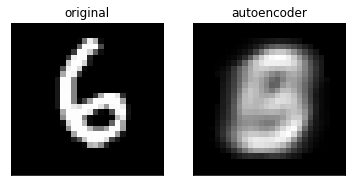

In [22]:
samples = Xtrain.shape[0]
for i in range(10):
    index = np.random.randint(samples)
    sample = Xtrain[index]
    gen = model.predict(sample[np.newaxis])[0]
    plt.subplot(1,2,1, title="original")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample.reshape(28,28), cmap="gray")
    plt.subplot(1,2,2, title="autoencoder")
    plt.imshow(gen.reshape(28,28), cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.show()
    